In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# patching
import sys
from pathlib import Path
sys.path.insert(0, str(Path.cwd().parent))

In [2]:
path = Path.cwd().parent.parent / "data" / "sensors_characteristics"

In [3]:
data_dir = path.parent

In [12]:
files = list(path.iterdir())

In [13]:
files

[WindowsPath('C:/Users/fmark/PycharmProjects/dissertation/data/sensors_characteristics/100М.csv'),
 WindowsPath('C:/Users/fmark/PycharmProjects/dissertation/data/sensors_characteristics/100П.csv'),
 WindowsPath('C:/Users/fmark/PycharmProjects/dissertation/data/sensors_characteristics/46П.csv'),
 WindowsPath('C:/Users/fmark/PycharmProjects/dissertation/data/sensors_characteristics/50М.csv'),
 WindowsPath('C:/Users/fmark/PycharmProjects/dissertation/data/sensors_characteristics/50П.csv'),
 WindowsPath('C:/Users/fmark/PycharmProjects/dissertation/data/sensors_characteristics/53М.csv'),
 WindowsPath('C:/Users/fmark/PycharmProjects/dissertation/data/sensors_characteristics/Cu 100.csv'),
 WindowsPath('C:/Users/fmark/PycharmProjects/dissertation/data/sensors_characteristics/Cu 50.csv'),
 WindowsPath('C:/Users/fmark/PycharmProjects/dissertation/data/sensors_characteristics/Pt 100.csv'),
 WindowsPath('C:/Users/fmark/PycharmProjects/dissertation/data/sensors_characteristics/Pt 50.csv'),
 Windows

In [14]:
files[:10]

[WindowsPath('C:/Users/fmark/PycharmProjects/dissertation/data/sensors_characteristics/100М.csv'),
 WindowsPath('C:/Users/fmark/PycharmProjects/dissertation/data/sensors_characteristics/100П.csv'),
 WindowsPath('C:/Users/fmark/PycharmProjects/dissertation/data/sensors_characteristics/46П.csv'),
 WindowsPath('C:/Users/fmark/PycharmProjects/dissertation/data/sensors_characteristics/50М.csv'),
 WindowsPath('C:/Users/fmark/PycharmProjects/dissertation/data/sensors_characteristics/50П.csv'),
 WindowsPath('C:/Users/fmark/PycharmProjects/dissertation/data/sensors_characteristics/53М.csv'),
 WindowsPath('C:/Users/fmark/PycharmProjects/dissertation/data/sensors_characteristics/Cu 100.csv'),
 WindowsPath('C:/Users/fmark/PycharmProjects/dissertation/data/sensors_characteristics/Cu 50.csv'),
 WindowsPath('C:/Users/fmark/PycharmProjects/dissertation/data/sensors_characteristics/Pt 100.csv'),
 WindowsPath('C:/Users/fmark/PycharmProjects/dissertation/data/sensors_characteristics/Pt 50.csv')]

In [15]:
files[10:]

[WindowsPath('C:/Users/fmark/PycharmProjects/dissertation/data/sensors_characteristics/ТВР (A-1).csv'),
 WindowsPath('C:/Users/fmark/PycharmProjects/dissertation/data/sensors_characteristics/ТВР (A-2).csv'),
 WindowsPath('C:/Users/fmark/PycharmProjects/dissertation/data/sensors_characteristics/ТВР (A-3).csv'),
 WindowsPath('C:/Users/fmark/PycharmProjects/dissertation/data/sensors_characteristics/ТЖК (J).csv'),
 WindowsPath('C:/Users/fmark/PycharmProjects/dissertation/data/sensors_characteristics/ТМК (T).csv'),
 WindowsPath('C:/Users/fmark/PycharmProjects/dissertation/data/sensors_characteristics/ТНН (N).csv'),
 WindowsPath('C:/Users/fmark/PycharmProjects/dissertation/data/sensors_characteristics/ТПП (R).csv'),
 WindowsPath('C:/Users/fmark/PycharmProjects/dissertation/data/sensors_characteristics/ТПП (S).csv'),
 WindowsPath('C:/Users/fmark/PycharmProjects/dissertation/data/sensors_characteristics/ТПР (B).csv'),
 WindowsPath('C:/Users/fmark/PycharmProjects/dissertation/data/sensors_chara

In [16]:
thermoresistors = list(files[:10])

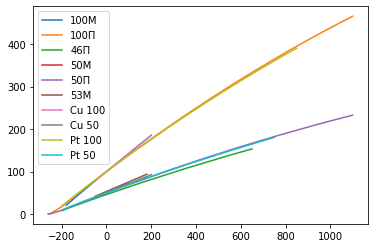

In [17]:
names = []
for file in thermoresistors:
    df = pd.read_csv(file)
    plt.plot(df["temp"], df["value"])
    names.append(file.name.split("/")[-1][:-4])
plt.legend(names)

In [18]:
thermocouples = list(files[10:])

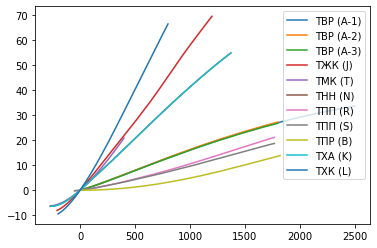

In [20]:
names = []
for file in thermocouples:
    df = pd.read_csv(file)
    plt.plot(df["temp"], df["value"])
    names.append(file.name.split("/")[-1][:-4])
plt.legend(names)

In [21]:
data_dir

WindowsPath('C:/Users/fmark/PycharmProjects/dissertation/data')

In [22]:
df = pd.read_csv(data_dir / "ad8400" / "ad8400_020.csv")

In [23]:
df.head()

,code,resistance
0,0,45
1,1,51
2,2,54
3,3,61
4,4,64


In [24]:
codes = list(df["code"])

In [25]:
ideal = [(d / 256) * 1000 + 50 for d in codes]

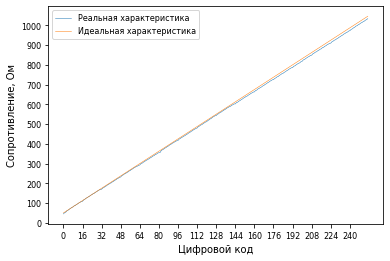

In [26]:
plt.xlabel("Цифровой код")
plt.ylabel("Сопротивление, Ом")
plt.yticks(np.arange(0, 1001, 100), fontsize=8)
plt.xticks(np.arange(0, 256, 16), fontsize=8)
plt.plot(df["code"], df["resistance"], linewidth=0.5)
plt.plot(codes, ideal, linewidth=0.5)
plt.legend(["Реальная характеристика", "Идеальная характеристика"], fontsize=8)

In [5]:
df_parallel = pd.read_csv(data_dir / "ad8400" / "parallel.csv")

In [6]:
df_parallel.head()

,resistance,r1_code,r2_code
0,21.51927,0,0
1,23.01268,0,1
2,23.09142,1,0
3,23.59327,0,2
4,23.90622,2,0


In [7]:
simulated_part = df_parallel[(df_parallel["resistance"] < 150) & (df_parallel["resistance"] > 40)]["resistance"]

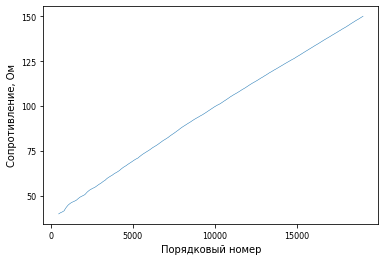

In [27]:
plt.xlabel("Порядковый номер")
plt.ylabel("Сопротивление, Ом")
plt.yticks(np.arange(0, 550, 25), fontsize=8)
plt.xticks(np.arange(0, len(simulated_part), 5000), fontsize=8)
plt.plot(simulated_part, linewidth=0.5)